Try to build a classifier for the MNIST dataset that achieves over 97%
accuracy on the test set. Hint: the KNeighborsClassifier works quite
well for this task; you just need to find good hyperparameter values (try
a grid search on the weights and n_neighbors hyperparameters).

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.96971427        nan 0.96866069        nan 0.96716069]
  warnings.warn(


Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Test set accuracy: 0.9728571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



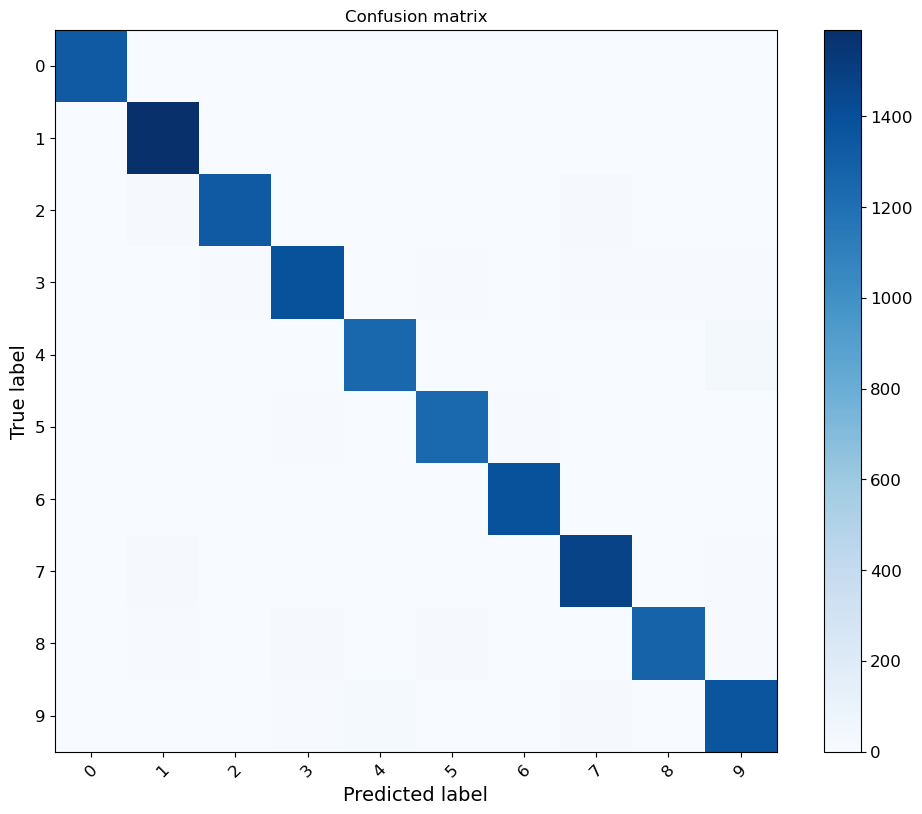

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance']  
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

def plot_confusion_matrix(y_true, y_pred, title='Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, np.unique(y_true), rotation=45)
    plt.yticks(tick_marks, np.unique(y_true))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(y_test, y_pred)
plt.show()

Write a function that can shift an MNIST image in any direction (left,
right, up, or down) by one pixel. Then, for each image in the training
set, create four shifted copies (one per direction) and add them to the
training set. Finally, train your best model on this expanded training set
and measure its accuracy on the test set. You should observe that your
model performs even better now! This technique of artificially growing
the training set is called data augmentation or training set expansion.

In [8]:
import pandas as pd

def shift_features(features, dx, dy):
    shifted_features = features.copy()
    shifted_features['Age'] = features['Age'].shift(periods=dx)
    return shifted_features

titanic_df = pd.read_csv("titanic.csv")

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_df['Survived']

X_train_augmented = pd.DataFrame(columns=X.columns)
y_train_augmented = pd.Series(dtype='int64')

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_X_train = shift_features(X, dx, dy)
    X_train_augmented = pd.concat([X_train_augmented, shifted_X_train], ignore_index=True)
    y_train_augmented = pd.concat([y_train_augmented, y], ignore_index=True)

X_train_augmented.dropna(inplace=True)
y_train_augmented = y_train_augmented[:len(X_train_augmented)]

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Step 1: Data loading and exploration
titanic_df = pd.read_csv("titanic.csv")
print(titanic_df.head())
print(titanic_df.isnull().sum())

# Step 2: Data preprocessing
# Fill missing age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

# Step 3: Feature engineering
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Step 4: Model selection and training
# Split the data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Step 5: Model evaluation
# Predict on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex       